In [ ]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [ ]:
# !pip install transformers
# run these if request and beautifulsoup dont work
# !pip install requests
# !pip install beautifulSoup4

### Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, utils
import requests
from bs4 import BeautifulSoup
import torch
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import copy
from selenium import webdriver
from selenium.webdriver.common.by import By


ModuleNotFoundError: No module named 'selenium'

### Web Scrapping to get news data

## Data 1

In [ ]:
url = 'https://www.cnbc.com/pro/news'


response = requests.get(url)

if response.status_code == 200:
  soup = BeautifulSoup(response.content, 'html.parser')

  tray_heading = soup.find_all('a',class_='LazyLoaderPlaceholder-headline')
  # count of news
  print(len(tray_heading))
  heading_list = []
  if tray_heading:
    headings = tray_heading
    # To print news one by one separately
    # for heading in headings:
    #   print(heading.text,'\n')
    for heading in headings:
      heading_list.append(heading.text)
    newsdf = pd.DataFrame()
    newsdf['Headline'] = heading_list
    print(newsdf)
  else:
    print("Div with class 'TrendingNowItem-title' not found")
else:
  print(f"Failed to retrieve content from the website. Status code: {response.status_code}")

34
                                             Headline
0   This winning sector could see even more upside...
1   Morgan Stanley says the catch-up trade in ener...
2   Investors are focused 'overwhelmingly' on bitc...
3   'The frenzy continues’: Researcher names 3 new...
4   Wall Street could be in for another good quart...
5   This semiconductor ETF is headed for its best ...
6   The S&P 500 is about to wrap the quarter with ...
7   The uptrend in this airline stock could be jus...
8   Here are the biggest first-quarter stock winne...
9   Gold could start to overtake bitcoin as the cr...
10  Apple's bad quarter and what history says will...
11  The S&P 500 is about to wrap the quarter with ...
12  Now that Nvidia's launched powerful AI chips, ...
13  Gold could start to overtake bitcoin as the cr...
14  Morgan Stanley says the catch-up trade in ener...
15  JPMorgan says 'all roads' of the AI boom lead ...
16  An options trade on a cheap energy stock that ...
17  Here are Thursday's b

## Data 2 (Includes Time and Author, WIP)

In [ ]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [ ]:
driver = web_driver()

driver.get('https://www.cnbc.com/pro/news/')
# driver.page_source

In [ ]:
newsdf = pd.DataFrame()
newses = driver.find_elements(By.CLASS_NAME,'Card-textContent')
headlines_list = []
author_list = []
date_list = []
for news in newses:
  info = (news.text).split('\n')
  if len(info) == 3:
    headline = info[0]
    headlines_list.append(headline)
    author = info[1]
    author_list.append(author)
    if 'AGO' in info[2]:
      date = '27-03-2024'
      date_list.append(date)
    else:
      date_list.append(str(info[2]))
  elif len(info) == 2:
    headline = info[0]
    headlines_list.append(headline)
    author_list.append(None)
    if 'AGO' in info[-1]:
      date = '27-03-2024'
      date_list.append(date)
    else:
      date_list.append(str(info[-1]))

newsdf['Headline'] = headlines_list
newsdf['Author'] = author_list
newsdf['Date'] = date_list

newsdf
  # headline = driver.find_element(By.XPATH,'//*[@id="SubscriptionSection-TwoColumnImageDense-ProNewsandAnalysis-2"]/div/div[2]/div[1]/div/div[2]/div/div[1]/div/div/a[2]').text
  # print(headline)
  # author = driver.find_element(By.XPATH,'//*[@id="SubscriptionSection-TwoColumnImageDense-ProNewsandAnalysis-2"]/div/div[2]/div[1]/div/div[2]/div/div[2]/span[1]/a').text
  # print(author)
  # date = driver.find_element(By.XPATH,'//*[@id="SubscriptionSection-TwoColumnImageDense-ProNewsandAnalysis-2"]/div/div[2]/div[1]/div/div[2]/div/div[2]/span[2]').text
  # print(date)

# Exploratory Data Analysis

In [ ]:
from wordcloud import WordCloud

In [ ]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  34 non-null     object
dtypes: object(1)
memory usage: 400.0+ bytes


In [ ]:
# plt.figure(figsize=(10,5))
# sns.countplot(y='Author',data=newsdf, palette='Set3', order= newsdf['Author'].value_counts().iloc[:10].index)
# sns.set_theme(style='darkgrid')
# plt.title('Top 10 Authors with count of news')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Number of unique words plotted: 231


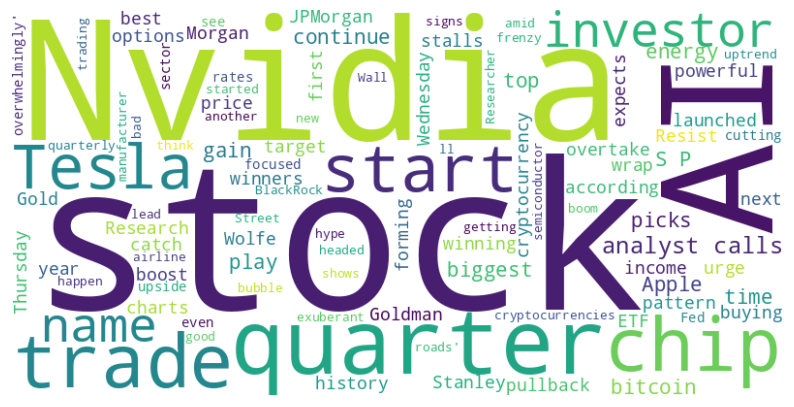

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')

# Get the English stop words from NLTK
stop_words = set(stopwords.words('english'))
stop_words.add('say')
stop_words.add('says')
# Remove stop words from each headline and join them into a single string
cleaned_headlines = [' '.join(word for word in headline.split() if (len(word) > 1) and (word.lower() not in stop_words)) for headline in newsdf['Headline']]

# Concatenate all headlines into a single string
all_headlines = ' '.join(cleaned_headlines)

# Count occurrences of each word
word_counts = Counter(all_headlines.split())

# Output the number of unique words plotted
num_unique_words = len(word_counts)
print("Number of unique words plotted:", num_unique_words)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate(all_headlines)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## nlptown/bert-base-multilingual-uncased-sentiment

Initializing Tokenizer and Model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# this is for single line test
# token = tokenizer.encode("Wall Street heads into the final March trading week with momentum on its side and Dow 40,000 in sight", return_tensors='pt')
# print(token)

In [ ]:
# This is for the data we are getting from scrapping
tokens = []
for headline in newsdf['Headline']:
    # Extract the actual string value from the Series
    encoded_tokens = tokenizer.encode(headline, return_tensors='pt')
    tokens.append(encoded_tokens)
print(tokens)

[tensor([[  101, 10372, 16420, 16838, 12296, 11811, 12818, 10772, 61729, 13181,
         12983, 10103, 42639, 30033, 49706, 31178,   102]]), tensor([[  101, 17313, 15669, 20782, 10103, 36410,   118, 10700, 13293, 10104,
         14828, 10743, 17576, 10110, 12276, 10491, 11397, 28531, 10107, 10114,
         11923,   102]]), tensor([[  101, 67446, 10320, 30893,   112, 10323, 10650, 33481, 18120, 10563,
           112, 10125, 16464, 10805, 10262, 10323, 10675, 29917, 15903, 20731,
         46642, 23804,   117, 11418, 40721, 20782,   102]]), tensor([[  101,   112, 10103, 12053, 50865, 10158, 24303,   100,   131, 83753,
         12276,   124, 10246, 35629, 10108, 10144, 11279, 89649, 16255, 10163,
           156, 80656, 13051, 11599,   102]]), tensor([[  101, 15813, 11902, 12296, 10346, 10104, 10139, 12162, 12050, 23688,
         10515, 10144, 11460, 60103, 20358, 13982, 10114, 10103, 10817,   117,
         10441, 15503,   102]]), tensor([[  101, 10372, 15546, 20978, 90055, 10137, 10481, 10

In [ ]:
# text = tokenizer.decode(token[0])
# print(text)

In [ ]:
result_list = []
for token in tokens:
  result = model(token)
  result_list.append(result)
# result gives us the probability of our text falling in each class ranging from 0-4 (Add 1 while printing to make it 1-5)
print(result_list)

[SequenceClassifierOutput(loss=None, logits=tensor([[-0.2727,  0.0510,  0.1284,  0.0933, -0.1616]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-1.6509, -1.3459, -0.3360,  1.0523,  1.7694]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[ 1.8238,  1.4738,  0.5036, -1.1315, -2.0272]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[ 0.4103,  0.1744, -0.0528, -0.0289, -0.3698]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-0.9720, -0.1991,  0.6163,  0.6089, -0.2274]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-2.1302, -2.2309, -0.4027,  1.4739,  2.7306]],
       grad_fn=<AddmmBackward0>), hidden_stat

## Model 1 Sentiment Results

Document-Level Sentiment


In [ ]:
finalclass_list = []
for result in result_list:
  finalclass = int(torch.argmax(result.logits))+1
  finalclass_list.append(finalclass)
model1news = copy.deepcopy(newsdf)
#model1news.drop(columns=['Author','Date'], inplace=True)
model1news['Sentiment'] = finalclass_list
model1news

,Headline,Sentiment
0,This winning sector could see even more upside...,3
1,Morgan Stanley says the catch-up trade in ener...,5
2,Investors are focused 'overwhelmingly' on bitc...,1
3,'The frenzy continues’: Researcher names 3 new...,1
4,Wall Street could be in for another good quart...,3
5,This semiconductor ETF is headed for its best ...,5
6,The S&P 500 is about to wrap the quarter with ...,3
7,The uptrend in this airline stock could be jus...,3
8,Here are the biggest first-quarter stock winne...,5
9,Gold could start to overtake bitcoin as the cr...,1


Aggregate-Level Sentiment Analysis

In [ ]:
overall_sentiment = round(model1news['Sentiment'].mean(),2)
overall_sentiment

3.03

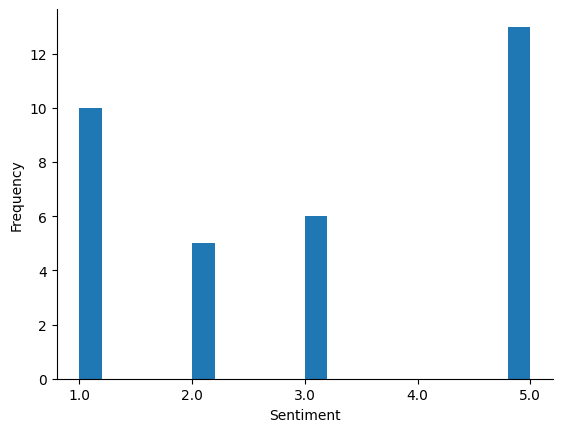

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

model1news['Sentiment'].plot(kind='hist', bins=20)

# Customize the x-axis ticks to display only integer values
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
plt.xlabel('Sentiment')


# Remove the top and right spines
plt.gca().spines[['top', 'right',]].set_visible(False)

## yiyanghkust/finbert-tone

https://huggingface.co/yiyanghkust/finbert-tone

This is a 3 class model (positive, neutral and negative)


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')

model = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
# token = tokenizer.encode("perfect day for microsoft stocks", return_tensors='pt')
# result = model(token)
# finalclass = int(torch.argmax(result.logits))+1
# print(finalclass)

In [ ]:
# text = tokenizer.decode(token[0])
# print(text)

In [ ]:
import copy
tokens = []

for headline in newsdf['Headline']:
    # Extract the actual string value from the Series
    encoded_tokens = tokenizer.encode_plus(headline, return_tensors='pt', padding=True)
    tokens.append(encoded_tokens)
print(tokens)

[{'input_ids': tensor([[   3,   26, 7131, 1058,   53,  153,  473,   59, 1191, 1384,    6, 6075,
         4609, 4095,  240,    4]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}, {'input_ids': tensor([[    3,   200,   313,  8276,     6,  8069,    85,   129,   582,    10,
           477,   110,   150,     8,  3620,    38,   909, 16338,     9,  2300,
             4]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}, {'input_ids': tensor([[    3,   311,    21,   959,  5674, 22295,   724,  5674,    19,   574,
          1898,  1419,    76,    34, 23912, 16807, 30121, 23521,   585, 10533,
          8276,     4]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 

In [ ]:
result_list = []
for token in tokens:
  result = model(**token)
  result_list.append(result)
# result gives us the probability of our text falling in each class ranging from 0-4 (Add 1 while printing to make it 1-5)
print(result_list)

[SequenceClassifierOutput(loss=None, logits=tensor([[-6.8460, 10.2799, -6.0785]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-2.8628,  7.0857, -8.8396]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[ 4.6421, -5.0241, -2.6142]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-1.0370,  0.7279, -0.5358]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-6.2279, 12.0746, -6.7112]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-6.9204, 10.5735, -4.8937]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-1.4175,  2.6532, -4.5107]], grad_fn=<AddmmBackward0>), hidden_states=N

## Sentiment Results

Document-Level Sentiment

In [ ]:
sentimentdict = {0:'Neutral',1:'Positive',2:'Negative'}
finalclass_list = []
for result in result_list:
  finalclass = result.logits.argmax().item()
  finalclass_list.append(sentimentdict[finalclass])
model2df = copy.deepcopy(newsdf)
#model2df.drop(columns=['Author','Date'],inplace=True)
model2df['Sentiment'] = finalclass_list
model2df

,Headline,Sentiment
0,This winning sector could see even more upside...,Positive
1,Morgan Stanley says the catch-up trade in ener...,Positive
2,Investors are focused 'overwhelmingly' on bitc...,Neutral
3,'The frenzy continues’: Researcher names 3 new...,Positive
4,Wall Street could be in for another good quart...,Positive
5,This semiconductor ETF is headed for its best ...,Positive
6,The S&P 500 is about to wrap the quarter with ...,Positive
7,The uptrend in this airline stock could be jus...,Positive
8,Here are the biggest first-quarter stock winne...,Neutral
9,Gold could start to overtake bitcoin as the cr...,Neutral


Aggregate-Level Sentiment Analysis

In [ ]:
## Turn back dataframe into numbers

sentiment_dict = {'Neutral': 0, 'Positive': 1, 'Negative': 2}

# Initialize a list to store numerical sentiment values
numerical_sentiment_list = []

# Convert sentiment labels to numerical values
for sentiment_label in finalclass_list:
    numerical_sentiment = sentiment_dict[sentiment_label]
    numerical_sentiment_list.append(numerical_sentiment)

In [ ]:
overall_sentiment = round(sum(numerical_sentiment_list)/len(numerical_sentiment_list),2)
overall_sentiment

0.74

Text(0, 0.5, 'Frequency')

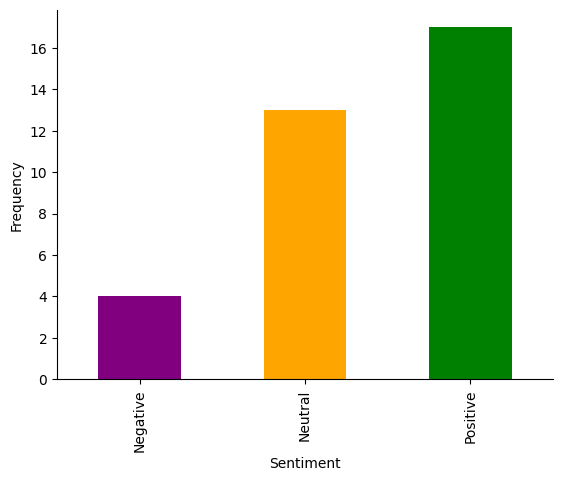

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns

custom_palette = ['purple', 'orange', 'green']


model2df.groupby('Sentiment').size().plot(kind='bar', color=custom_palette)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Frequency')

## Pro page headlines

In [ ]:


url = 'https://www.cnbc.com/pro/'


response = requests.get(url)

if response.status_code == 200:
  soup = BeautifulSoup(response.content, 'html.parser')

  tray_heading = soup.find_all('div', class_='TrayCard-headline')

  if tray_heading:
    headings = tray_heading
    for heading in headings:
      print(heading.text,'\n')
  else:
    print("Div with class 'TrayHeading' not found")
else:
  print(f"Failed to retrieve content from the website. Status code: {response.status_code}")

Morgan Stanley says the catch-up trade in energy can continue and names its top picks to play 

'The frenzy continues’: Researcher names 3 new signs of an AI bubble amid Nvidia hype 

Here are Thursday's biggest analyst calls: Nvidia, Meta, Tesla, Apple, CyberArk, Grindr, Estee Lauder & more 

Thursday's analyst calls: Bank of America price target hike, hot dog stock to rally 50%? 

Now that Nvidia's launched powerful AI chips, Goldman expects these 3 stocks to get a boost 

Citi says buying chip stocks ahead of their AI presentations is a winning trade and this name is next  

Here are Wednesday's biggest analyst calls: Apple, Nvidia, Tesla, Spotify, Marvell, Netflix, Disney, DraftKings & more 

Wednesday's analyst calls: Wells Fargo downgrade, Tesla gets a price target cut 

Nvidia's partners and more: BofA picks key global stocks along the AI supply chain 

Reddit could fall nearly 10% from here as momentum from strong IPO fades, New Street Research says 

JPMorgan says 'all roads' 

## User Input

### Model 1

In [ ]:
news = input('Enter the headline: ')
print(news)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
encoded_token = tokenizer.encode(news, return_tensors='pt')
result = model(encoded_token)
finalclass = int(torch.argmax(result.logits))+1
print('Negative     Neutral     Positive')
print('1\t\t3\t  5')
print(f'Sentiment  {finalclass}')

### Model 2

In [ ]:
sentimentdict = {0:'neutral',1:'Positive',2:'Negative'}

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
tokens = tokenizer.encode_plus(news, return_tensors='pt', padding=True)
outputs = model(**tokens)
predicted_class = outputs.logits.argmax().item()
sentimentdict[predicted_class]

Notes:
- use encode plus for finBert or only gives two options
- plot sentiment overtime will be interesting...
- Remove single characters from headlines to display word cloud
